In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

X = df[['Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]

# discard exmaples in the first class
X = X[50:150]
y = np.where(y[50:150] == 2, -1, y[50:150])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels: %s' % np.unique(y))

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Training data points: 80
#Testing data points: 20
Class labels: [-1  1]


In [2]:
class AdalineSGD(object):
    def __init__(self, eta: float = 0.01, n_iter: int = 50, batch_size: int = 1, shuffle: bool = True,
                 random_state=1) -> None:
        self._eta = eta
        self._n_iter = n_iter
        # mini batch size
        self._batch_size = batch_size
        self._w_initialized = False
        self._shuffle = shuffle
        if random_state:
            np.random.seed(random_state)
        self._cost = []

    def predict(self, x: np.ndarray) -> np.ndarray:
        return np.where(self.activation(x) >= 0.0, 1, -1)

    def initialize_weights(self, m: int) -> None:
        if not self._w_initialized:
            self.w = np.random.normal(loc=0.0, scale=0.01, size=m + 1)
            self.w_initialized = True

    def shuffle(self, x: np.ndarray, y: np.ndarray) -> (np.ndarray, np.ndarray):
        r = np.random.permutation(len(y))
        return x[r], y[r]

    def net_input(self, x: np.ndarray) -> np.ndarray:
        return np.dot(x, self.w[1:]) + self.w[0]

    def activation(self, x: np.ndarray) -> np.ndarray:
        return self.net_input(x)

    def update_weights(self, x: np.ndarray, y: np.ndarray):
        output_list = []
        cost = 0
        for xi in x:
            output_list.append(self.activation(xi))
        for output, target in zip(output_list, y):
            error = (target - output)
            self.w[1:] += self._eta * xi.dot(error)
            self.w[0] += self._eta * error
            cost += 0.5 * error**2
        return cost

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        self.initialize_weights(x.shape[1])
        batch_iter = int(len(y) / self._batch_size)
        for i in range(self._n_iter):
            if self._shuffle:
                x, y = self.shuffle(x, y)
            cost = []
            for j in range(batch_iter):
                # print(j)
                cost.append(self.update_weights(x[self._batch_size * j: self._batch_size * (j+1)],
                                                y[self._batch_size * j: self._batch_size * (j+1)]))
            avg_cost = sum(cost) / len(y)
            self._cost.append(avg_cost)

Batch size=1, Accuracy: 0.85
Batch size=4, Accuracy: 0.85
Batch size=8, Accuracy: 0.90


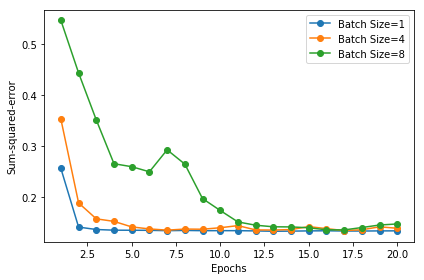

In [3]:
from sklearn.metrics import accuracy_score
# batch size = 1
adas_1 = AdalineSGD(n_iter=20, eta=0.01, batch_size=1, random_state=1)
adas_1.fit(X_train_std, y_train)
y_pred = adas_1.predict(X_test_std)
print('Batch size=1, Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# batch size = 4
adas_4 = AdalineSGD(n_iter=20, eta=0.01, batch_size=4, random_state=1)
adas_4.fit(X_train_std, y_train)
y_pred = adas_4.predict(X_test_std)
print('Batch size=4, Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# batch size = 8
adas_8 = AdalineSGD(n_iter=20, eta=0.01, batch_size=8, random_state=1)
adas_8.fit(X_train_std, y_train)
y_pred = adas_8.predict(X_test_std)
print('Batch size=8, Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# cost values

plt.plot(range(1, len(adas_1._cost) + 1), adas_1._cost, 
         marker='o', label='Batch Size=1')
plt.plot(range(1, len(adas_4._cost) + 1), adas_4._cost, 
         marker='o', label='Batch Size=4')
plt.plot(range(1, len(adas_8._cost) + 1), adas_8._cost, 
         marker='o', label='Batch Size=8')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('./output/Lab04-1_108062633.png', dpi=300)
plt.show()